## Import Data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
data = pd.read_csv('/Users/muhammadzuamaalamin/Documents/Matkuls2/KK/tugas/DukuhKupang.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timezone                  40043 non-null  object 
 1   Datetime                  40043 non-null  object 
 2   AQI US                    40043 non-null  int64  
 3   AQI CN                    40043 non-null  int64  
 4   PM2.5 (ug/m3)             40043 non-null  float64
 5   PM10 (ug/m3)              40043 non-null  int64  
 6   CO2 (ppm)                 40043 non-null  int64  
 7   Temperature (Celsius)     40043 non-null  float64
 8   Temperature (Fahrenheit)  40043 non-null  float64
 9   Humidity (%)              40043 non-null  int64  
 10  HCHO (ppb)                0 non-null      float64
 11  TVOC (ppb)                0 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.7+ MB


In [7]:
data = data.drop(columns = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM2.5 (ug/m3)             40043 non-null  float64
 1   PM10 (ug/m3)              40043 non-null  int64  
 2   CO2 (ppm)                 40043 non-null  int64  
 3   Temperature (Celsius)     40043 non-null  float64
 4   Temperature (Fahrenheit)  40043 non-null  float64
 5   Humidity (%)              40043 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.8 MB


In [9]:
data.isnull().sum()

PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64

In [10]:
data.isna().sum()

PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64

In [11]:
data.duplicated().sum()

1079

In [12]:
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [13]:
data.describe(

)

,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Temperature (Fahrenheit),Humidity (%)
count,38964.000000,38964.000000,38964.000000,38964.000000,38964.000000,38964.000000
mean,39.743335,76.813289,430.712837,28.752682,83.755156,79.632789
std,33.883835,67.627962,21.405303,3.630710,6.535834,12.612558
min,3.000000,3.000000,390.000000,23.800000,74.800000,41.000000
25%,19.000000,36.000000,416.000000,26.000000,78.700000,72.000000
50%,30.000000,57.000000,426.000000,27.500000,81.500000,83.000000
75%,49.000000,92.000000,440.000000,30.700000,87.200000,90.000000
max,1798.800000,2000.000000,628.000000,41.500000,106.700000,97.000000


In [14]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 5026


In [15]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 5026 potential outliers.
Removing 2066 potential outliers.
Removing 987 potential outliers.
Removing 431 potential outliers.
Removing 229 potential outliers.
Removing 135 potential outliers.
Removing 170 potential outliers.
Removing 355 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 29565


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Temperature (Fahrenheit),Humidity (%)
25,16.0,35,427,37.6,99.6,49
26,12.0,30,426,37.6,99.6,48
27,16.0,35,422,37.5,99.4,50
28,12.0,18,421,37.3,99.1,49
29,11.0,13,424,37.1,98.8,50


In [16]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29565 entries, 25 to 40042
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM2.5 (ug/m3)             29565 non-null  float64
 1   PM10 (ug/m3)              29565 non-null  int64  
 2   CO2 (ppm)                 29565 non-null  int64  
 3   Temperature (Celsius)     29565 non-null  float64
 4   Temperature (Fahrenheit)  29565 non-null  float64
 5   Humidity (%)              29565 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


In [17]:
# from sklearn.preprocessing import StandardScaler

# # Dataframe kamu: data_cleaned
# features = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO2 (ppm)", "Temperature (Celsius)", "Temperature (Fahrenheit)", "Humidity (%)"]


<Axes: >

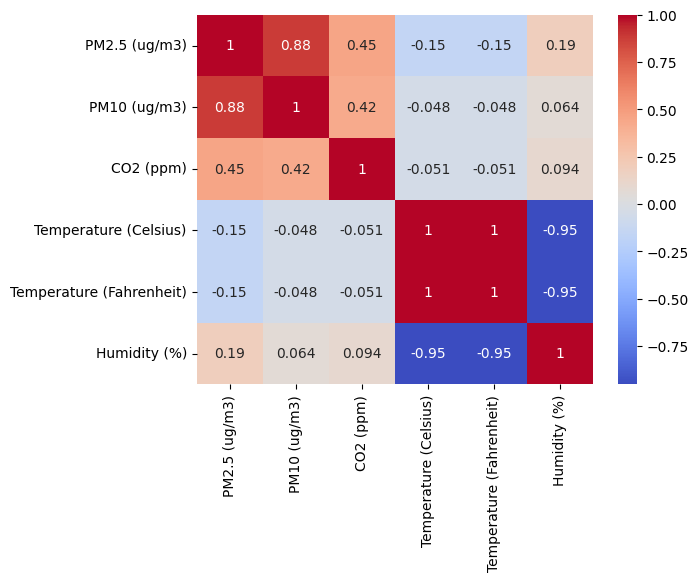

In [18]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [19]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:04<00:39,  4.99s/it]

k=2, Silhouette Score=0.3563


Clustering progress:  22%|██▏       | 2/9 [00:09<00:34,  4.89s/it]

k=3, Silhouette Score=0.3469


Clustering progress:  33%|███▎      | 3/9 [00:14<00:28,  4.79s/it]

k=4, Silhouette Score=0.2825


Clustering progress:  44%|████▍     | 4/9 [00:19<00:23,  4.78s/it]

k=5, Silhouette Score=0.2810


Clustering progress:  56%|█████▌    | 5/9 [00:24<00:19,  4.79s/it]

k=6, Silhouette Score=0.2636


Clustering progress:  67%|██████▋   | 6/9 [00:28<00:14,  4.82s/it]

k=7, Silhouette Score=0.2669


Clustering progress:  78%|███████▊  | 7/9 [00:33<00:09,  4.85s/it]

k=8, Silhouette Score=0.2618


Clustering progress:  89%|████████▉ | 8/9 [00:38<00:04,  4.94s/it]

k=9, Silhouette Score=0.2458


Clustering progress: 100%|██████████| 9/9 [00:44<00:00,  4.90s/it]

k=10, Silhouette Score=0.2359


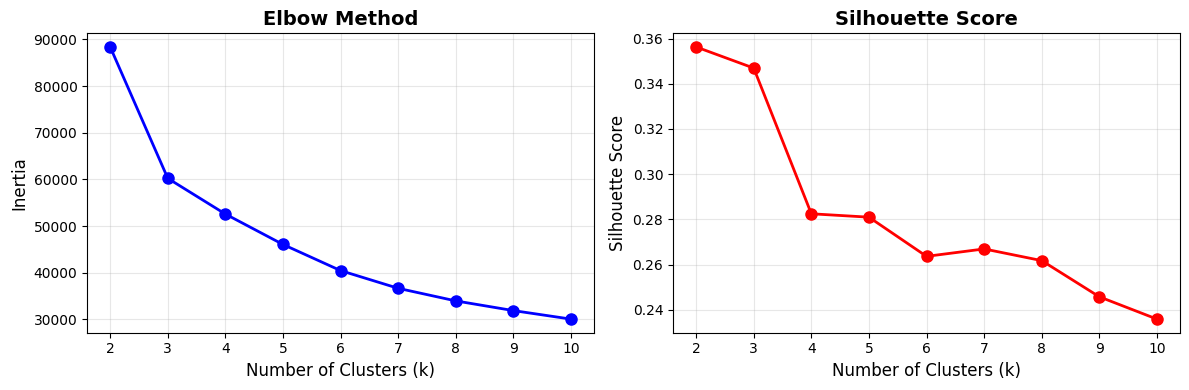

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=2, n_init=10, random_state=42)

In [23]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

         PM2.5 (ug/m3)  PM10 (ug/m3)   CO2 (ppm)  Temperature (Celsius)  \
Cluster                                                                   
0            23.235792     46.646500  420.200364              32.988121   
1            30.564074     55.556808  424.430477              26.819786   

         Temperature (Fahrenheit)  Humidity (%)  
Cluster                                          
0                       91.379599     64.394744  
1                       80.275229     85.959226  


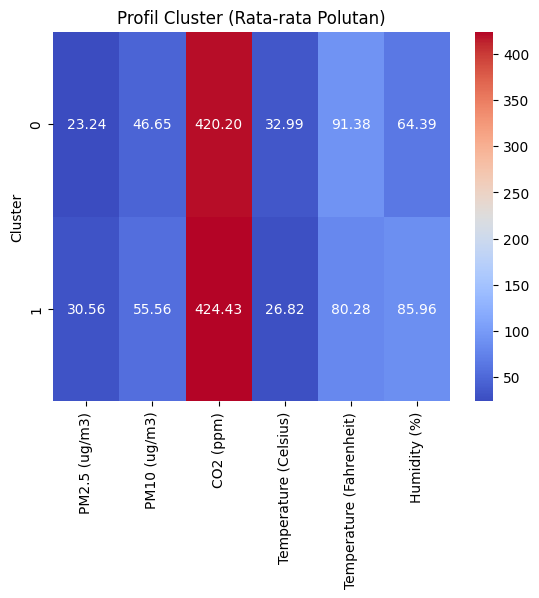

In [24]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [25]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
1    15966
0     7686
Name: count, dtype: int64


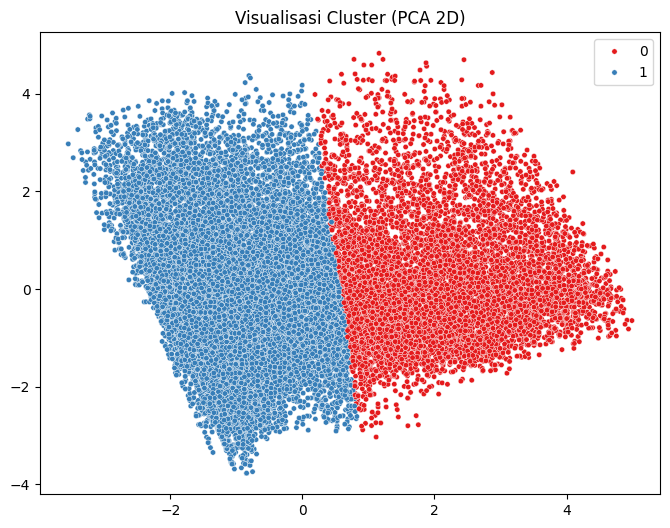

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.3562826529327684
Davies-Bouldin Index: 1.1069375495942095


In [28]:
# Gabungkan kembali train dan test yang sudah di-scale
import numpy as np

X_final = np.vstack([X_train_scaled, X_test_scaled])  # Gabung array
y_final = np.hstack([train_clusters, test_clusters])   # Gabung label cluster

In [29]:

# === 3. Siapkan data untuk klasifikasi ===

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)



=== Random Forest ===
Accuracy: 0.9932352443767969
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1930
           1       1.00      0.99      0.99      3983

    accuracy                           0.99      5913
   macro avg       0.99      0.99      0.99      5913
weighted avg       0.99      0.99      0.99      5913



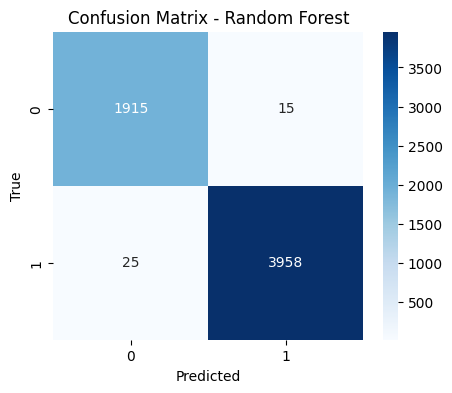


=== SVM ===
Accuracy: 0.9972940977507188
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1930
           1       1.00      1.00      1.00      3983

    accuracy                           1.00      5913
   macro avg       1.00      1.00      1.00      5913
weighted avg       1.00      1.00      1.00      5913



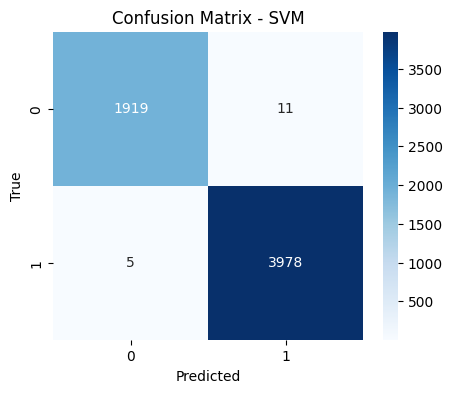


=== KNN ===
Accuracy: 0.9883307965499746
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1930
           1       0.99      0.99      0.99      3983

    accuracy                           0.99      5913
   macro avg       0.99      0.99      0.99      5913
weighted avg       0.99      0.99      0.99      5913



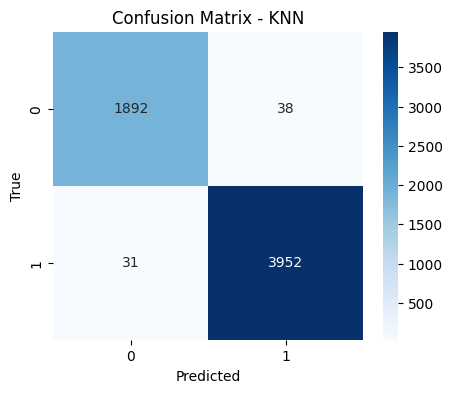


=== Naive Bayes ===
Accuracy: 0.9758159986470488
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1930
           1       0.99      0.97      0.98      3983

    accuracy                           0.98      5913
   macro avg       0.97      0.98      0.97      5913
weighted avg       0.98      0.98      0.98      5913



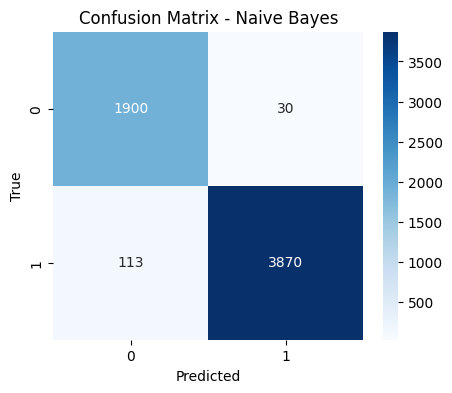


=== Decition Tree ===
Accuracy: 0.9879925587688144
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1930
           1       0.99      0.99      0.99      3983

    accuracy                           0.99      5913
   macro avg       0.99      0.99      0.99      5913
weighted avg       0.99      0.99      0.99      5913



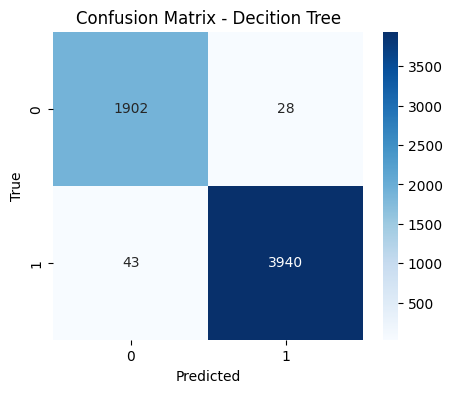

In [30]:
from sklearn.tree import DecisionTreeClassifier
# === 4. Definisi model ===
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decition Tree": DecisionTreeClassifier(random_state=42),
}

# === 5. Training & Evaluasi ===
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test_cls, y_pred))
    print(classification_report(y_test_cls, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()